In [140]:
import pandas as pd
import numpy as np
from IPython.display import display

#Plots:
import plotly.graph_objects as go
import plotly.express as px

In [141]:
filepath = "Enron_Kaggle_dataset/Enron_2001.csv" ### VErsion for testing code is running
filepath = "Enron_Kaggle_dataset/email_data_updated.csv"

# Read the data into a pandas dataframe called emails
df = pd.read_csv(filepath)

In [145]:
df.head(50)

,From,employee,To,X-Origin
0,phillip.allen@enron.com,allen-p,tim.belden@enron.com,Allen-P
1,phillip.allen@enron.com,allen-p,john.lavorato@enron.com,Allen-P
2,phillip.allen@enron.com,allen-p,leah.arsdall@enron.com,Allen-P
3,phillip.allen@enron.com,allen-p,randall.gay@enron.com,Allen-P
4,phillip.allen@enron.com,allen-p,greg.piper@enron.com,Allen-P
5,phillip.allen@enron.com,allen-p,greg.piper@enron.com,Allen-P
6,phillip.allen@enron.com,allen-p,"david.l.johnson@enron.com, john.shafer@enron.com",Allen-P
7,phillip.allen@enron.com,allen-p,joyce.teixeira@enron.com,Allen-P
8,phillip.allen@enron.com,allen-p,mark.scott@enron.com,Allen-P
9,phillip.allen@enron.com,allen-p,zimam@enron.com,Allen-P


In [143]:
# df['year'] = pd.DatetimeIndex(df['Date']).year
df.columns.to_list()

['email-body',
 'From',
 'employee',
 'Date',
 'Subject',
 'X-Folder',
 'To',
 'X-cc',
 'X-Origin']

In [144]:
# df = df.drop(['Date','Subject','X-Folder','X-cc','X-Origin','email-body'], axis=1)
df = df.drop(['Date','Subject','X-Folder','X-cc','email-body'], axis=1)

df.head()

,From,employee,To,X-Origin
0,phillip.allen@enron.com,allen-p,tim.belden@enron.com,Allen-P
1,phillip.allen@enron.com,allen-p,john.lavorato@enron.com,Allen-P
2,phillip.allen@enron.com,allen-p,leah.arsdall@enron.com,Allen-P
3,phillip.allen@enron.com,allen-p,randall.gay@enron.com,Allen-P
4,phillip.allen@enron.com,allen-p,greg.piper@enron.com,Allen-P


In [146]:
df_group = df.groupby(['From','employee','To'], as_index=False).count()
df_group.rename(columns={'X-Origin':'freq'}, inplace=True)


In [184]:
df_group.sort_values(by='freq', ascending= False).head(20)

,From,employee,To,freq
16938,chris.germany@enron.com,germany-c,scott.goodell@enron.com,225
82145,mike.grigsby@enron.com,grigsby-m,anne.bike@enron.com,122
84988,navigator@nisource.com,pimenov-v,navigator@nisource.com,91
29192,drew.fossum@enron.com,fossum-d,jeffery.fawcett@enron.com,67
117260,vasant.shanbhogue@enron.com,kaminski-v,vince.kaminski@enron.com,56
98621,sally.beck@enron.com,beck-s,"david.delainey@enron.com, john.lavorato@enron.com",40
31519,elizabeth.sager@enron.com,sager-e,mark.haedicke@enron.com,37
13886,ccvevents@aol.com,baughman-d,ccvevents@aol.com,34
62920,khou-weatherwarn@khou.weatherwarn.net,taylor-m,"weatherwarn@mailman.enron.com, subscribers@mai...",31
106656,stephanie.piwetz@enron.com,dean-c,clint.dean@enron.com,30


In [148]:
# Shape of df
df_group.shape

(121286, 4)

In [149]:
### Selection of small subset for development:
df_group = df_group.loc[np.random.choice(df_group.index, 1000, replace=False)] # 1000 emails

In [150]:
# How many people are we studying?
df_group['employee'].nunique()

136

In [151]:
import networkx as nx

In [337]:
## Creating a Graph

g=nx.Graph()

### Building nodes and edges:

for idx, feature in df_group.iterrows():
    
    g.add_edge(feature[1],feature[2],weight=feature[3]) #Representing the weight of connection between two people

In [338]:
### Checking nodes:

#Returns list of nodes

nodes = g.nodes(data=True)

In [339]:
# for node in nodes:
#     print(node)

In [363]:
### Exploring order of information :

for node, adjacencies in enumerate(g.adjacency()):
    print("Node:", node)
    print('Pos 0:', adjacencies[0])
    print(type(adjacencies[0]))

    print('Pos 1:', adjacencies[1].keys())
    print(type(adjacencies[1]))
    print('Weight:', adjacencies[1].values())


    print('\n ')
    
    if counter == 5:
        break



Node: 0
Pos 0: dasovich-j
<class 'str'>
Pos 1: dict_keys(['market_participant_ab1@calpx.com, market_participant_cd2@calpx.com, \n\tmarket_participant_eg1@calpx.com, market_participant_eg2@calpx.com, \n\tmarket_participant_hj1@calpx.com, market_participant_mn1@calpx.com, \n\tmarket_participant_or1@calpx.com, market_participant_or2@calpx.com', 'robert.hemstock@enron.com, skean@enron.com', 'richard.shapiro@enron.com, d..steffes@enron.com, susan.mara@enron.com, \n\tpaul.kaufman@enron.com, alan.comnes@enron.com, \n\trobert.frank@enron.com', 'piper.cole@sun.com', 'jeff.dasovich@enron.com, michael.tribolet@enron.com', 'jeff.dasovich@enron.com, stephanie.miller@enron.com, jane.tholt@enron.com, \n\tmike.grigsby@enron.com', 'dks@cpuc.ca.gov', 'kaplan@iepa.com, jdasovic@enron.com, knorton@mcnallytemple.com, \n\tjohn_h_stout@reliantenergy.com, curtis_l_kebler@reliantenergy.com, \n\trllamkin@seiworldwide.com, rbw@mrwassoc.com, susan_j_mara@enron.com, \n\tabb@eslawfirm.com, rescalante@riobravo-gm.co

Pos 0: mary.hain@enron.com
<class 'str'>
Pos 1: dict_keys(['hain-m'])
<class 'dict'>
Weight: dict_values([{'weight': 2}])

 
Node: 160
Pos 0: ragan.bond@enron.com, m..love@enron.com, c..giron@enron.com
<class 'str'>
Pos 1: dict_keys(['giron-d'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 161
Pos 0: cash-m
<class 'str'>
Pos 1: dict_keys(['michelle.cash@enron.com', 'richard.sanders@enron.com', 'kevin.ormston@enron.com, d..trevino@enron.com, jamie.wachel@enron.com, \n\tjudey.napoli@enron.com, linda.fuqua@enron.com, tony.vasut@enron.com, \n\tfrank.de@enron.com', 'lizzette.palmer@enron.com, catherine.huynh@enron.com', "marla.barnard@enron.com, cynthia.barrow@enron.com, melissa.becker@enron.com, \n\tsharon.butcher@enron.com, pam.butler@enron.com, \n\tmichelle.cash@enron.com, brad.coleman@enron.com, \n\tneil.davies@enron.com, a..davis@enron.com, terrie.james@enron.com, \n\tk..jones@enron.com, mary.joyce@enron.com, elyse.kalmans@enron.com, \n\tkelly.kimberly@enron.com, a..knu

Pos 1: dict_keys(['sturm-f'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 314
Pos 0: jeffrey.mcmahon@enron.com, raymond.bowen@enron.com
<class 'str'>
Pos 1: dict_keys(['shankman-j'])
<class 'dict'>
Weight: dict_values([{'weight': 3}])

 
Node: 315
Pos 0: hyvl-d
<class 'str'>
Pos 1: dict_keys(['bradley.diebner@enron.com', 'debra.perlingiere@enron.com, dan.hyvl@enron.com', 'kyle.lilly@enron.com', 'dan.j.hyvl@enron.com', 'debra.perlingiere@enron.com, jeffrey.hodge@enron.com, \n\tstacy.dickson@enron.com'])
<class 'dict'>
Weight: dict_values([{'weight': 2}, {'weight': 2}, {'weight': 4}, {'weight': 2}, {'weight': 2}])

 
Node: 316
Pos 0: bradley.diebner@enron.com
<class 'str'>
Pos 1: dict_keys(['hyvl-d'])
<class 'dict'>
Weight: dict_values([{'weight': 2}])

 
Node: 317
Pos 0: jarnold@ei.enron.com
<class 'str'>
Pos 1: dict_keys(['arnold-j'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 318
Pos 0: 'lerea.pharr'@enron.com
<class 'str'>
Pos 1: dict_keys(['lokey-t

Weight: dict_values([{'weight': 3}, {'weight': 3}, {'weight': 1}])

 
Node: 479
Pos 0: edward.terry@enron.com, robert.superty@enron.com, patti.sullivan@enron.com, 
	victor.lamadrid@enron.com, carlos.rodriguez@enron.com, 
	pat.clynes@enron.com, randall.gay@enron.com, 
	katherine.kelly@enron.com, bryce.baxter@enron.com, 
	rita.wynne@enron.com
<class 'str'>
Pos 1: dict_keys(['gay-r'])
<class 'dict'>
Weight: dict_values([{'weight': 3}])

 
Node: 480
Pos 0: forney-j
<class 'str'>
Pos 1: dict_keys(['juan.hernandez@enron.com', 'peter.maheu@enron.com'])
<class 'dict'>
Weight: dict_values([{'weight': 1}, {'weight': 3}])

 
Node: 481
Pos 0: juan.hernandez@enron.com
<class 'str'>
Pos 1: dict_keys(['forney-j'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 482
Pos 0: larry.berger@enron.com, lynn.blair@enron.com, michael.bodnar@enron.com, 
	john.buchanan@enron.com, terry.kowalke@enron.com, 
	raetta.zadow@enron.com, ramona.betancourt@enron.com, 
	legale.black@enron.com, mary.draemer@e

Weight: dict_values([{'weight': 2}])

 
Node: 597
Pos 0: david.delaney@enron.com
<class 'str'>
Pos 1: dict_keys(['rogers-b'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 598
Pos 0: sshackl@enron.com
<class 'str'>
Pos 1: dict_keys(['shackleton-s'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 599
Pos 0: lewis-a
<class 'str'>
Pos 1: dict_keys(['alex.villarreal@enron.com, lindsay.culotta@enron.com, \n\tbryant.frihart@enron.com, c..giron@enron.com, laura.luce@enron.com, \n\tl..mims@enron.com, e.murrell@enron.com, gregg.penman@enron.com, \n\ts..pollan@enron.com, linda.roberts@enron.com, \n\tpatrick.tucker@enron.com, martin.cuilla@enron.com, \n\ttom.donohoe@enron.com, h..lewis@enron.com, \n\tsouad.mahmassani@enron.com, denver.plachy@enron.com, \n\tkevin.ruscitti@enron.com, s..shively@enron.com, \n\tgeoff.storey@enron.com, alex.villarreal@enron.com, \n\ttrading <.williams@enron.com>, virawan.yawapongsiri@enron.com', 'bxqik@sapo.pt', 'gilder-technology-report@e

Weight: dict_values([{'weight': 1}, {'weight': 3}, {'weight': 2}])

 
Node: 724
Pos 0: s..pollan@enron.com, lindsay.culotta@enron.com, e.murrell@enron.com, 
	denver.plachy@enron.com, martin.cuilla@enron.com, 
	geoff.storey@enron.com, virawan.yawapongsiri@enron.com, 
	souad.mahmassani@enron.com, tom.donohoe@enron.com, 
	kevin.ruscitti@enron.com, s..shively@enron.com, h..lewis@enron.com, 
	c..giron@enron.com, bryant.frihart@enron.com, 
	linda.roberts@enron.com, laura.luce@enron.com, d..hogan@enron.com, 
	frank.vickers@enron.com, trading <.williams@enron.com>, 
	l..mims@enron.com, james.simpson@enron.com, john.hodge@enron.com, 
	f..keavey@enron.com, brad.mckay@enron.com, jonathan.mckay@enron.com, 
	w..pereira@enron.com, vladi.pimenov@enron.com, andrea.ring@enron.com, 
	leonidas.savvas@enron.com, judy.townsend@enron.com, 
	victoria.versen@enron.com, robin.barbe@enron.com, 
	ruth.concannon@enron.com, scott.goodell@enron.com, 
	david.jones@enron.com, jared.kaiser@enron.com, 
	scott.loving@en


 
Node: 867
Pos 0: barbara.gray@enron.com, jeffrey.hodge@enron.com, julia.murray@enron.com
<class 'str'>
Pos 1: dict_keys(['sager-e'])
<class 'dict'>
Weight: dict_values([{'weight': 2}])

 
Node: 868
Pos 0: bruno.gaillard@enron.com, mona.petrochko@enron.com, paul.kaufman@enron.com, 
	sandra.mccubbin@enron.com, jeff.dasovich@enron.com, 
	jennifer.rudolph@enron.com, chris.hendrix@enron.com, 
	greg.cordell@enron.com, harold.buchanan@enron.com, 
	martin.wenzel@enron.com, douglas.condon@enron.com, 
	james.wood@enron.com, gary.mirich@enron.com, 
	dennis.benevides@enron.com, roger.yang@enron.com, mday@gmssr.com, 
	paul.kaufman@enron.com, marcie.milner@enron.com, 
	harry.kingerski@enron.com, james.steffes@enron.com, 
	richard.shapiro@enron.com, peggy.mahoney@enron.com, 
	mark.palmer@enron.com, steven.kean@enron.com, tim.belden@enron.com
<class 'str'>
Pos 1: dict_keys(['dasovich-j'])
<class 'dict'>
Weight: dict_values([{'weight': 2}])

 
Node: 869
Pos 0: ann.schmidt@enron.com, mona.petrochko@e

Pos 0: hrgim@enron.com
<class 'str'>
Pos 1: dict_keys(['hyatt-k'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 1011
Pos 0: daren.farmer@enron.com, edward.terry@enron.com, o'neal.winfree@enron.com, 
	julie.meyers@enron.com
<class 'str'>
Pos 1: dict_keys(['farmer-d'])
<class 'dict'>
Weight: dict_values([{'weight': 4}])

 
Node: 1012
Pos 0: faith.killen@enron.com, r..shepperd@enron.com
<class 'str'>
Pos 1: dict_keys(['kitchen-l'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 1013
Pos 0: randy.o'connor@enron.com
<class 'str'>
Pos 1: dict_keys(['shankman-j'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 1014
Pos 0: m..taylor@enron.com, greg.whalley@enron.com
<class 'str'>
Pos 1: dict_keys(['whalley-g'])
<class 'dict'>
Weight: dict_values([{'weight': 1}])

 
Node: 1015
Pos 0: simon.hemsley@enron.com, tom.doukas@enron.com, sara.shackleton@enron.com
<class 'str'>
Pos 1: dict_keys(['shackleton-s'])
<class 'dict'>
Weight: dict_values([{'weight': 1

In [381]:
for node in G.edges():
    print(G.edges[node]) ### This give me the weight assigned to the edge
    print(G.edges[node]['weight']) ### This give me the weight assigned to the edge
    print(type(G.edges[node]['weight']))
print(len(G.edges()))

{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 10}
10
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 6}
6
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 14}
14
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weig

<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 6}
6
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'in

In [334]:
edges = g.edges()

In [343]:
#### Exploring order of information:

for counter, edge in enumerate(G.edges()):
    print(type(edge))
    print('\n')
    print(edge[0])
    print(edge[1])
    if counter == 3:
        break

<class 'tuple'>


dasovich-j
market_participant_ab1@calpx.com, market_participant_cd2@calpx.com, 
	market_participant_eg1@calpx.com, market_participant_eg2@calpx.com, 
	market_participant_hj1@calpx.com, market_participant_mn1@calpx.com, 
	market_participant_or1@calpx.com, market_participant_or2@calpx.com
<class 'tuple'>


dasovich-j
robert.hemstock@enron.com, skean@enron.com
<class 'tuple'>


dasovich-j
richard.shapiro@enron.com, d..steffes@enron.com, susan.mara@enron.com, 
	paul.kaufman@enron.com, alan.comnes@enron.com, 
	robert.frank@enron.com
<class 'tuple'>


dasovich-j
piper.cole@sun.com


NOTE
There are two ways to list nodes in the graph. g.nodes() produces a list of nodes, and g.nodes_iter() produces a Python iterator. An iterator is limited to use in loops only—but takes significantly less memory and is faster on large graphs

In [220]:
# Returns nodes along with their atributes (as a dictionary):

# g.nodes(data=True)
# g.edges(data=True)

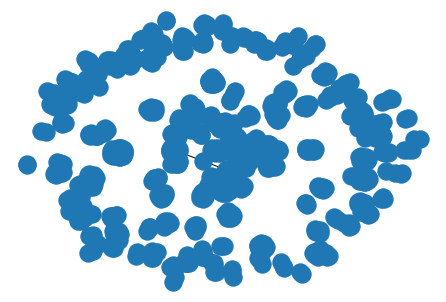

In [221]:
### A first preview of the network:
nx.draw(g)

This is due to the data being largely fragmentary and incomplete; we should concern ourselves with the largest component of the network only

In [222]:
# # Connected_component_subgraphs() returns a list of components, 
# # sorted largest to smallest

components= nx.connected_components(g)  ### A generator of sets of nodes, one for each component of G
# components=max(nx.connected_components(g), key=len) ### Getting the the largest connected component

In [223]:
# To create the induced subgraph of each component use:

S = [g.subgraph(c) for c in components]

In [267]:
# # Get positions for the nodes in G
pos_ = nx.spring_layout(g)    ### ??????????????? Is this helpfull

In [268]:
pos_

{'dasovich-j': array([-0.13455293, -0.53657353]),
 'market_participant_ab1@calpx.com, market_participant_cd2@calpx.com, \n\tmarket_participant_eg1@calpx.com, market_participant_eg2@calpx.com, \n\tmarket_participant_hj1@calpx.com, market_participant_mn1@calpx.com, \n\tmarket_participant_or1@calpx.com, market_participant_or2@calpx.com': array([-0.11382526, -0.52437055]),
 'shapiro-r': array([0.16228727, 0.69990826]),
 'cindy.ward@enron.com': array([0.14872283, 0.70148897]),
 'lay-k': array([-0.37686756, -0.20799582]),
 'klay@enron.com': array([-0.4066442 , -0.19933273]),
 'kean-s': array([ 0.14598094, -0.30171418]),
 "ann.schmidt@enron.com, bryan.seyfried@enron.com, elizabeth.linnell@enron.com, \n\tfiluntz@aol.com, james.steffes@enron.com, janet.butler@enron.com, \n\tjeannie.mandelker@enron.com, jeff.dasovich@enron.com, \n\tjoe.hartsoe@enron.com, john.neslage@enron.com, \n\tjohn.sherriff@enron.com, joseph.alamo@enron.com, \n\tkaren.denne@enron.com, lysa.akin@enron.com, mark.palmer@enron.

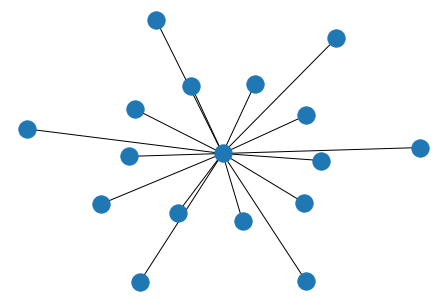

In [253]:
nx.draw(S[1])
# nx.draw(S[2])

### How can I interpret this plot?
#What is it representing each node?

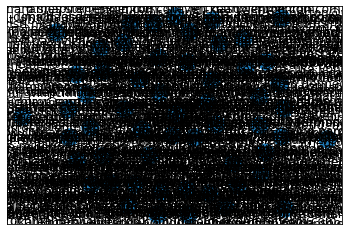

In [255]:
nx.draw_networkx(S[0], with_labels=True)   ##"Not helpful"

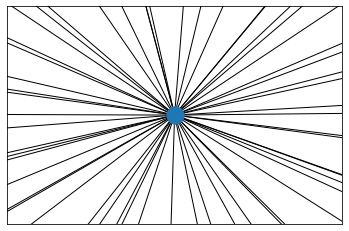

In [258]:
nx.draw_networkx(S[0], with_labels=False, nodelist = ['dasovich-j'])   ##"Not helpful"

In [248]:
# How many netkwork graphs do I have? Are you sure is that what S represents?
len(S)

112

In [361]:
# for element in pos_:
#     print(element)

In [423]:
#### Create nodes to plot:

G = g

node_x = []
node_y = []

for count, node in enumerate(G.nodes()):
    x, y = pos_[node]
    node_x.append(x)
    node_y.append(y)
    if count ==1:break

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Portland',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

### Create edges to plot:

edge_x = []
edge_y = []

for edge in G.edges():
    
    weight_edges = G.edges()[edge]['weight']

    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width= 0.3*weight_edges, color='#888'),   ###Define the line connecting nodes
    hoverinfo='none',
    mode='lines')

In [424]:
node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(G.adjacency()):
    
    node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1]))) ###Shows the #of connections
    node_text.append('#Connection: '+str(adjacencies[0]))


node_trace.marker.color = node_adjacencies    #### Color or size???? trace.marker.color or .size
node_trace.text = node_text

In [425]:
### Create Network Graph:

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Testing Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="1,2,3 Testing",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [426]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1]))) ###Shows the #of connections
    node_text.append('#Connection: '+str(adjacencies[0]))


node_trace.marker.size = node_adjacencies    #### Color or size???? trace.marker.color or .size
node_trace.text = node_text

### Create Network Graph:

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Testing Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="1,2,3 Testing",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


### The bubbles have the size according with the number of total email connections

In [398]:
traceRecode = []
node_trace = go.Scatter(x=[], y=[], hovertext=[], text=[], mode='markers+text', textposition="bottom center",
                        hoverinfo="text", marker={'size': 50, 'color': 'LightSkyBlue'})
G = g
index = 0
for node in G.nodes():
    x, y = G.node[node]['pos']
    hovertext = "CustomerName: " + str(G.nodes[node]['CustomerName']) + "<br>" + "AccountType: " + str(
        G.nodes[node]['Type'])
    text = node1['Account'][index]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['hovertext'] += tuple([hovertext])
    node_trace['text'] += tuple([text])
    index = index + 1
    
traceRecode.append(node_trace)

AttributeError: 'Graph' object has no attribute 'node'

### Make edge traces

The function takes in two nodes (characters), x and y, any text that you want to appear when you hover over the edge, and the width of the edge trace.

In [230]:
# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

In [190]:
# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in g.edges():
    
    if g.edges()[edge]['weight'] > 100:   ### Filter by weight
        char_1 = edge[0]
        char_2 = edge[1]

        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]

        text   = char_1 + '--' + char_2 + ': ' + str(g.edges()[edge]['weight'])
        
        trace  = make_edge([x0, x1, None], [y0, y1, None], text,
                           0.3*g.edges()[edge]['weight']**1.75)

        edge_trace.append(trace)

In [231]:
#  Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node in midsummer, get the position and size and add to the node_trace
for node in g.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
#     node_trace['marker']['size'] += tuple([5*g.nodes()[node]['size']])   #### I haven't indicated nodes size
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

In [232]:
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)


fig = go.Figure(layout = layout)

for trace in edge_trace:
    fig.add_trace(trace)

fig.add_trace(node_trace)

fig.update_layout(showlegend = False)

fig.update_xaxes(showticklabels = False)

fig.update_yaxes(showticklabels = False)

fig.show()
# py.plot(fig, filename='network.html')   ### Check what I need to make this work